In [1]:
#Importing all the necessarylibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df_train=pd.read_csv("train_agri.csv")
df_train["source"]="train"
df_test=pd.read_csv("test_agri.csv")
df_test["source"]="test"
df=df_train
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,188,1,0,1,0,0.0,0,1,0,train
1,209,1,0,1,0,0.0,0,2,1,train
2,257,1,0,1,0,0.0,0,2,1,train
3,257,1,1,1,0,0.0,0,2,1,train
4,342,1,0,1,0,0.0,0,2,1,train


In [3]:
# Cleaning Dataset

In [4]:
for i in df.columns:
    a=df[i].unique()
    len(a)
    print(i,len(a))
    if len(a)<5:
        print(a)

Estimated_Insects_Count 71
Crop_Type 2
[1 0]
Soil_Type 2
[0 1]
Pesticide_Use_Category 3
[1 3 2]
Number_Doses_Week 20
Number_Weeks_Used 64
Number_Weeks_Quit 47
Season 3
[1 2 3]
Crop_Damage 3
[0 1 2]
source 1
['train']


In [5]:
df.nunique()

Estimated_Insects_Count    71
Crop_Type                   2
Soil_Type                   2
Pesticide_Use_Category      3
Number_Doses_Week          20
Number_Weeks_Used          63
Number_Weeks_Quit          47
Season                      3
Crop_Damage                 3
source                      1
dtype: int64

In [6]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'source'],
      dtype='object')

In [7]:
df.shape

(3939, 10)

In [8]:
#Check for Null Values
df.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          385
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
source                       0
dtype: int64

In [9]:
#Observation:

#1. Number_Weeks_Used has 9000  missing data.

In [10]:
#Replacing missing values with mode of the data .
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

In [11]:
# Again Checking for Null Values
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

In [12]:
#Observation:

#Clearly ,there are no null values present in the dataset.

In [13]:
#Checking Datatypes 
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
source                      object
dtype: object

In [14]:
#Observation:

#1.ID column is in object datatype.

#2.Rest all columns are in int64 datatype except Number_Weeks_Used column.

In [15]:
#Exploratory Data Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  3939 non-null   int64  
 1   Crop_Type                3939 non-null   int64  
 2   Soil_Type                3939 non-null   int64  
 3   Pesticide_Use_Category   3939 non-null   int64  
 4   Number_Doses_Week        3939 non-null   int64  
 5   Number_Weeks_Used        3939 non-null   float64
 6   Number_Weeks_Quit        3939 non-null   int64  
 7   Season                   3939 non-null   int64  
 8   Crop_Damage              3939 non-null   int64  
 9   source                   3939 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 307.9+ KB


<AxesSubplot:>

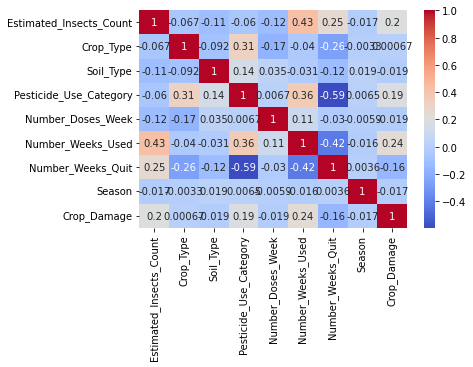

In [17]:
#Checking Correlation using heatmap
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [18]:
#Observation:

#1.Estimated_Insects_count,Pesticide_use_category and Number_weeks_used are positively correlated with Crop damage.

#2.Number_weeks_used  is positively correlated with Estimated_Insects_count and Pesticide_use_category. 

#3.Number_weeks_Quit is highly negatively correlated with Pesticide_use_category and Number_weeks_used.

In [19]:
#Univariate Analysis:

<Figure size 864x360 with 0 Axes>

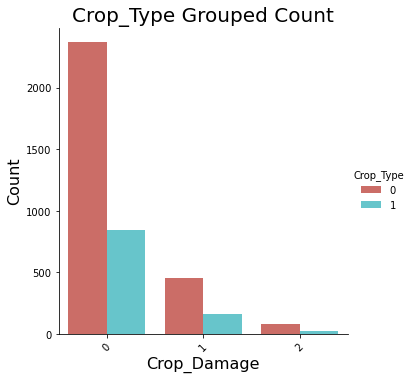

In [20]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Damage', data=df, palette="hls",kind='count',hue='Crop_Type')
plt.xlabel("Crop_Damage", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crop_Type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [21]:
#Observations:

#1. Crop damage due to pesticides are less in comparison to damage due to other causes.
#2. Crop type 0 has higher chance of survival compared to crop type 1.

Text(0.5, 1.0, 'Crop Damage vs Pesticide Use Category ')

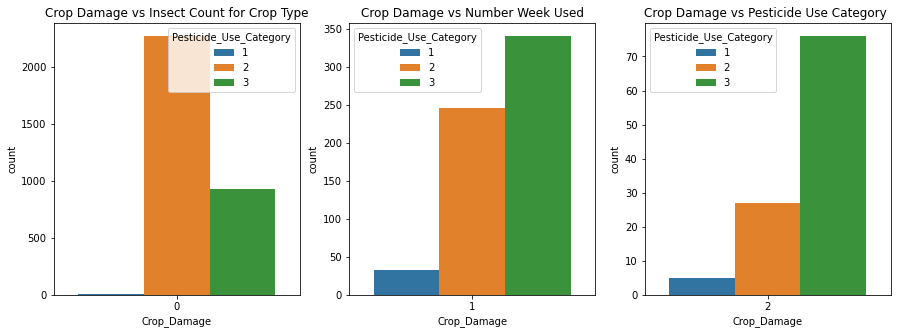

In [22]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==0],ax=ax1)
ax1.set_title("Crop Damage vs Insect Count for Crop Type")
ax2=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==1],ax=ax2)
ax2.set_title("Crop Damage vs Number Week Used")
ax3=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==2],ax=ax3)
ax3.set_title("Crop Damage vs Pesticide Use Category ")

In [23]:
#Observations:
     #   1.Type 2 pesticide is much safer to use as compared to Type 3 pesticide.

     #   2.Type 3 pesticide shows most pesticide-related damage to crops.

<Figure size 864x360 with 0 Axes>

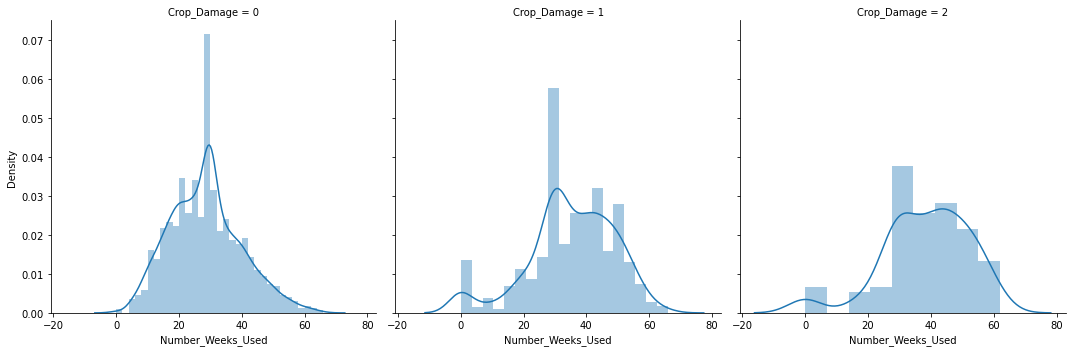

In [24]:
plt.figure(figsize=(12,5))
g= sns.FacetGrid(df, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Weeks_Used")
plt.show()

In [25]:
#Observations:
#From Graph 1 we can conclude that till 20-25 weeks damage due to pesticide is negligible.
#From Graph 3 we can see that after 20 weeks damage due to use of pesticide increrases significantly.

In [26]:
# Bivariate Analysis:

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

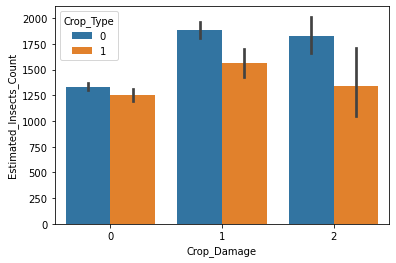

In [27]:
sns.barplot(x="Crop_Damage" ,y="Estimated_Insects_Count",hue="Crop_Type",data=df)

In [28]:
#Observations:
#Clearly observed that Most insect attacks are done on crop type 0.

<Figure size 864x360 with 0 Axes>

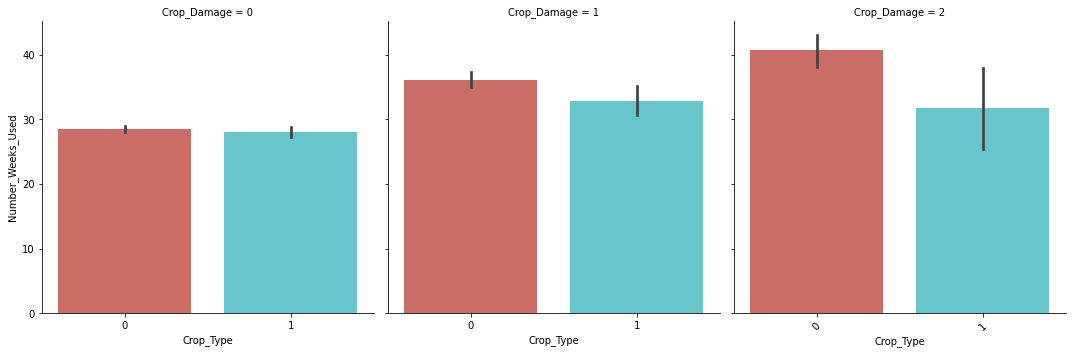

In [29]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Type',y='Number_Weeks_Used', data=df, palette="hls",kind='bar',col='Crop_Damage')
plt.xticks(rotation=45)
plt.show()

In [30]:
#Observations:
#Crop Type 0 is more vulnerable to pesticide related and other damages as compared to Type1
#Avg. duration of pesticide related damage is lower for Crop type 1.

In [31]:
#Data Pre-processing :
#Outliers Analysis : 
#Outliers - an extreme value that deviates from the other observations in the dataset

In [32]:
#Lets use the describe function 
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000
mean,1401.646357,0.262503,0.389439,2.331048,26.166540,29.738604,8.565880,1.897436,0.212237
std,844.989938,0.440050,0.487685,0.494334,15.537719,12.196214,9.691635,0.694344,0.471259
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,732.000000,0.000000,0.000000,2.000000,15.000000,21.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,29.738604,5.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [33]:
# Obeservation
# 1.Clearly some outliers are present in Insect_Count ,doses_week and number_weeks_quit columns.

In [34]:
#Dropping Source column from the data for outlier analysis
df.drop(columns=["source"],axis=1,inplace=True)
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

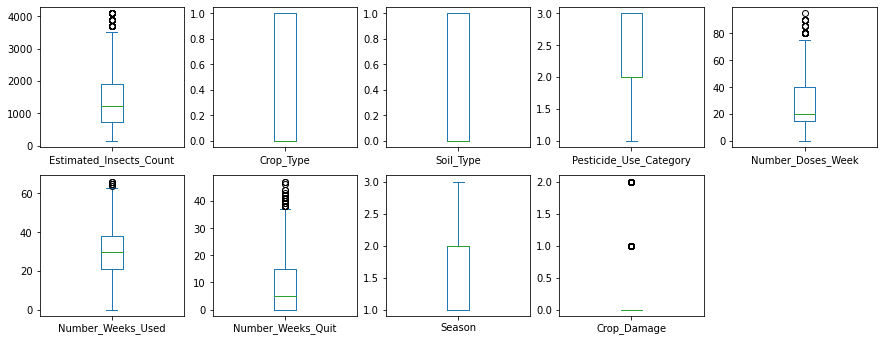

In [35]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [36]:
#Observation
#Clearly, some outliers are present in Insect_Count, doses_week, and number_weeks_quit columns.

In [37]:
#Removing Outliers

In [38]:
#now finding the mean value of each column and replacing with outlier value
df.loc[df['Number_Weeks_Used']>55,'Number_Weeks_Used'] = np.mean(df["Number_Weeks_Used"])
df.loc[df['Estimated_Insects_Count']>3500,'Estimated_Insects_Count'] = np.mean(df["Estimated_Insects_Count"])
df.loc[df['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.mean(df["Number_Weeks_Quit"])
df.loc[df['Number_Doses_Week']>80,'Number_Doses_Week'] = np.mean(df["Number_Doses_Week"])

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

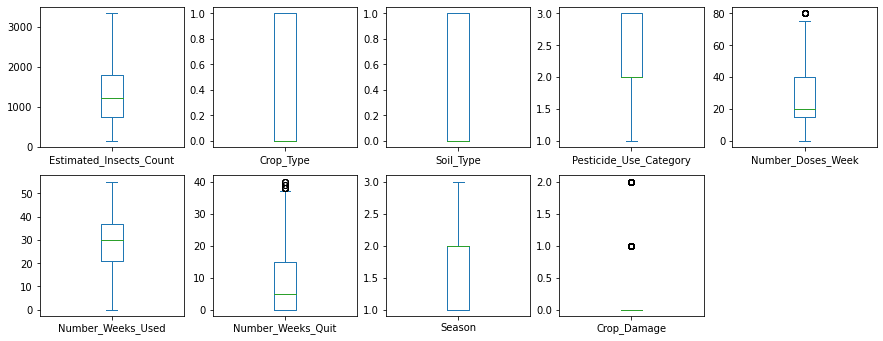

In [39]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

#we can see that outliers have been removed in Total Volume , Large, Small and Total bags

In [40]:
#Lets use the describe function 
#now finding the mean value of each column and replacing with outlier value
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000
mean,1339.841640,0.262503,0.389439,2.331048,26.008293,29.089774,8.410557,1.897436,0.212237
std,751.278796,0.440050,0.487685,0.494334,15.215224,11.361625,9.412919,0.694344,0.471259
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,732.000000,0.000000,0.000000,2.000000,15.000000,21.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,29.738604,5.000000,2.000000,0.000000
75%,1786.000000,1.000000,1.000000,3.000000,40.000000,37.000000,15.000000,2.000000,0.000000
max,3337.000000,1.000000,1.000000,3.000000,80.000000,55.000000,40.000000,3.000000,2.000000


In [41]:
#Observations:
#1.we can see that outliers have been removed in Insect_Count, Number_Doses_Weeks,Number_Weeks_Quit

In [42]:
# Skew Analysis : 
# Checking skewness of our data using histplot and observed that all the data is normally distributed.
#Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution,
# in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.

In [43]:
df.skew()

Estimated_Insects_Count    0.634470
Crop_Type                  1.079956
Soil_Type                  0.453642
Pesticide_Use_Category     0.431946
Number_Doses_Week          0.880357
Number_Weeks_Used          0.036020
Number_Weeks_Quit          0.962972
Season                     0.139971
Crop_Damage                2.159286
dtype: float64

array([[<AxesSubplot:title={'center':'Estimated_Insects_Count'}>,
        <AxesSubplot:title={'center':'Crop_Type'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>,
        <AxesSubplot:title={'center':'Pesticide_Use_Category'}>],
       [<AxesSubplot:title={'center':'Number_Doses_Week'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Used'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Quit'}>,
        <AxesSubplot:title={'center':'Season'}>],
       [<AxesSubplot:title={'center':'Crop_Damage'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

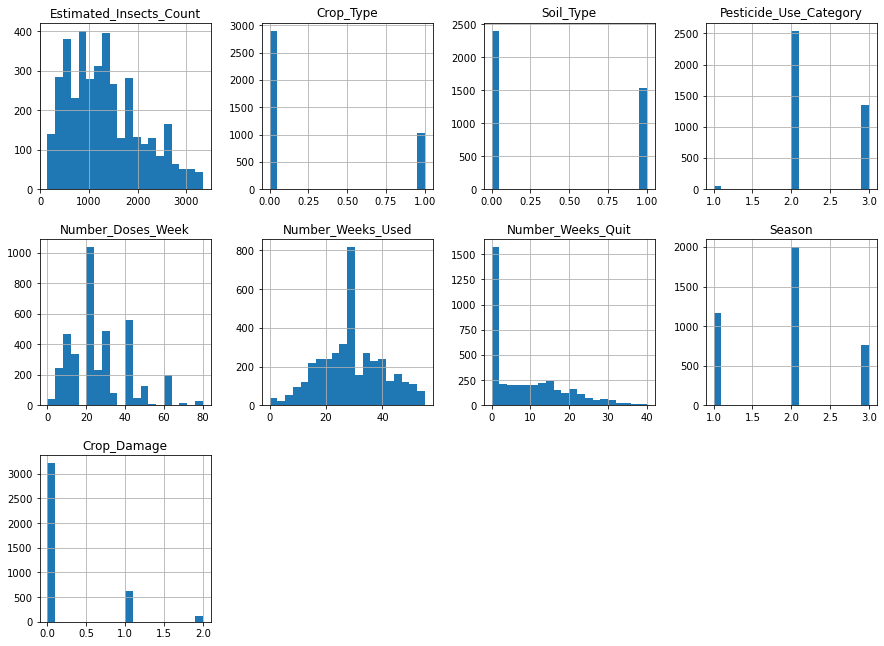

In [44]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

In [45]:
# Observations:
#1. We can see that all the data is normally distributed.

In [46]:
#Classifier Modelling

In [47]:
#Scaling Dataset:
#As usual, the first step is to drop the target variable and then scaling the dataset by using Standard Scaler to make the data normally distributed.

#Splitting Dataset:
#After preprocessing, we now split the data into training/testing subsets.

#Evaluating Models:
#We now checked various classification models and calculated metrics such as the precision, recall, and F1 score.

#The models we will run here are:

#Random Forest
#K Nearest Neighbor(KNN)
#Decision Tree Classifier
#Gaussian NB

In [48]:
#Importing libraries
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [49]:
# Dropping region and Day from x for classifcation dataset
#Assigning the value of x for testing and training
df_xc=df.drop(columns=['Crop_Damage'])
yc=df[["Crop_Damage"]]

In [50]:
#Bring every column to common scale by using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xc = sc.fit_transform(df_xc)
df_xc=pd.DataFrame(xc,columns=df_xc.columns)

In [51]:
#defining a function to find accuracy score, crossvalidation score for the given dataset
def max_acc_score(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    for r_state in range(42,100):
        train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = r_state,test_size = 0.33,stratify = yc)
        model_c.fit(train_xc,train_yc)
        accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
        if accuracy_scr> accuracy_scr_max:
            accuracy_scr_max=accuracy_scr
            final_state = r_state
            final_model = model_c
            mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").mean()
            std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").std()
            cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy")
    print('\033[1m',"Results for model : ",names,'\n','\033[0m'
          "max accuracy score is" , accuracy_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print("*"*100)

In [52]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 
accuracy_scr_max = []
accuracy=[]
std_dev=[]
mean_acc=[]
cross_val=[]
models=[]
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Gaussian NB',GaussianNB()))

for names,model_c in models:
    max_acc_score(names,model_c,df_xc,yc)

 Results for model :  Random Forest 
 max accuracy score is 0.8207692307692308 
 Mean accuracy score is :  0.7466498751926934 
 Std deviation score is :  0.08695927914603901 
 Cross validation scores are :   [0.74746193 0.79568528 0.82106599 0.59263959 0.80813215]
****************************************************************************************************
 Results for model :  KNN 
 max accuracy score is 0.8207692307692308 
 Mean accuracy score is :  0.7700014189978006 
 Std deviation score is :  0.05471843875214104 
 Cross validation scores are :   [0.75888325 0.79441624 0.82233503 0.66878173 0.80559085]
****************************************************************************************************
 Results for model :  Decision Tree Classifier 
 max accuracy score is 0.7453846153846154 
 Mean accuracy score is :  0.6425625165280994 
 Std deviation score is :  0.09641704704166972 
 Cross validation scores are :   [0.63071066 0.64974619 0.75126904 0.47208122 0.7064803 ]
**

In [53]:
#Observations: 
#a. From initial model accuracy values we see that KNN are performing better than others.  
#b. It has maximum accuracy score and minimum standard deviations.   
#c. DTC is the worst performer with 74% accuracy.

In [54]:
# Estimating best n_neighbors using grid search CV for KNeighborsClassifier

kNN=KNeighborsClassifier()
parameters={"n_neighbors":range(2,30)}
clf = GridSearchCV(kNN, parameters, cv=5,scoring="accuracy")
clf.fit(df_xc,yc)
clf.best_params_

{'n_neighbors': 28}

In [55]:
#Again running KNeighborsClassifier with n_neighbor = 28
kNN=KNeighborsClassifier(n_neighbors=28)
max_acc_score("KNeighbors Classifier",kNN,df_xc,yc)

 Results for model :  KNeighbors Classifier 
 max accuracy score is 0.8269230769230769 
 Mean accuracy score is :  0.8045217654912635 
 Std deviation score is :  0.01550832831805964 
 Cross validation scores are :   [0.78045685 0.81472081 0.81979695 0.79187817 0.81575604]
****************************************************************************************************


In [56]:
#To check model performance, we will now plot different performance metrics.

In [57]:
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,random_state = 80,test_size=0.20,stratify=yc)
kNN.fit(xc_train,yc_train)
yc_pred=kNN.predict(xc_test)

accuracy score is :  0.8197969543147208
classification report 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       642
           1       0.58      0.09      0.15       124
           2       0.00      0.00      0.00        22

    accuracy                           0.82       788
   macro avg       0.47      0.36      0.35       788
weighted avg       0.76      0.82      0.76       788



<AxesSubplot:>

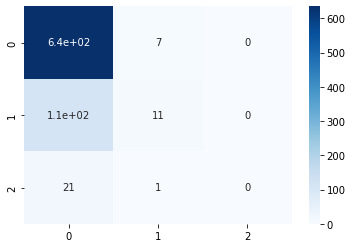

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))

cnf = confusion_matrix(yc_test,yc_pred)
sns.heatmap(cnf, annot=True, cmap = "Blues")

In [59]:
#Observations:

#1.Due to abnormal distribution of data point -model is highly accurate in predicting no crop damage but needs 
#improvement in predicting pesticide crop damage.

#2.Attempting to use ADABoost Classifier to boostup accuracy of the model.

#From observation, we found decent accuracy ( ~0.82), precision, and recall for the model. 
#This indicates that the model is a good fit for the prediction.

In [60]:
#Using adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=10,learning_rate=1)
ad.fit(xc_train,yc_train)
ad_pred=ad.predict(xc_test)
print(accuracy_score(yc_test,ad_pred))
print(confusion_matrix(yc_test,ad_pred))
print(classification_report(yc_test,ad_pred))

0.8185279187817259
[[641   1   0]
 [120   4   0]
 [ 22   0   0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       642
           1       0.80      0.03      0.06       124
           2       0.00      0.00      0.00        22

    accuracy                           0.82       788
   macro avg       0.54      0.34      0.32       788
weighted avg       0.79      0.82      0.74       788



In [61]:
#Not much improvement is observed by using ADABoost model.
#But overall it gives good accuracy among all models so we save as our final model.

In [62]:
#Saving Final Model

In [63]:
df_test.isnull().any().any()

True

In [64]:
df_test.isnull().any()

Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used           True
Number_Weeks_Quit          False
Season                     False
source                     False
dtype: bool

In [65]:
df_test.fillna(df_train.mean(), inplace=True)

In [66]:
df_test.isnull().any()

Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used          False
Number_Weeks_Quit          False
Season                     False
source                     False
dtype: bool

In [67]:
#From above we see AdaBoostClassifier is performing better so we will use it to make our final predictions.

In [68]:
#Outcome_pred=ad.predict(df_test)

In [69]:
#Dropping Source column from the data for outlier analysis
df_test.drop(columns=["source"],axis=1,inplace=True)
df_test.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [70]:
Outcome_pred=ad.predict(df_test)
Outcome_pred=pd.DataFrame(Outcome_pred,columns=["Crop_Damage"])
Outcome_pred.to_csv('Crop_Damage_Predictions.csv_AD',index=False)

In [71]:
Outcome_pred=ad.predict(df_test)
Outcome_pred=pd.DataFrame(Outcome_pred,columns=["Crop_Damage"])
Outcome_pred.to_csv('Crop_Damage_Predictions.csv_AD',index=False)

In [72]:
#print (ad.predict([[900, 1, 1, 1, 0, 0, 0 ,2]]))

In [73]:
Outcome_predd=kNN.predict(df_test)
Outcome_predd=pd.DataFrame(Outcome_predd,columns=["Crop_Damage"])
Outcome_predd.to_csv('Crop_Damage_Predictions_KNN.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'Crop_Damage_Predictions_KNN.csv'